In [1]:
import numpy as np
import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# import string

# Load dataset

In [2]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,"Subject: Hello djordje, This April, our webina...",1
1,Subject: naturally irresistible your corporate...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: 4 color printing special request add...,1
...,...,...
5724,Subject: re : research and development charges...,0
5725,"Subject: re : receipts from visit jim , than...",0
5726,Subject: re : enron case study update wow ! a...,0
5727,"Subject: re : interest david , please , call...",0


In [3]:
df.shape

(5729, 2)

In [4]:
df.columns

Index(['text', 'spam'], dtype='object')

# Preprocessing data

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(5696, 2)

In [7]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
X = df['text']
X

0       Subject: Hello djordje, This April, our webina...
1       Subject: naturally irresistible your corporate...
2       Subject: the stock trading gunslinger  fanny i...
3       Subject: unbelievable new homes made easy  im ...
4       Subject: 4 color printing special  request add...
                              ...                        
5724    Subject: re : research and development charges...
5725    Subject: re : receipts from visit  jim ,  than...
5726    Subject: re : enron case study update  wow ! a...
5727    Subject: re : interest  david ,  please , call...
5728    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5696, dtype: object

In [9]:
y = df['spam']
y

0       1
1       1
2       1
3       1
4       1
       ..
5724    0
5725    0
5726    0
5727    0
5728    0
Name: spam, Length: 5696, dtype: int64

In [10]:
# Download stopwords
# nltk.download('stopwords')

In [11]:
# def process_text(text):
#     #1 remove punctuation
#     #2 remove stopwords
#     #3 return a list of clean text words
    
#     #1
#     nopunc = [char for char in text if char not in string.punctuation]
#     nopunc = ''.join(nopunc)
    
#     #2 
#     clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
#     #3 
#     return clean_words


# X = [process_text(i) for i in X ]
# X = [i for l in X for i in l]
# len(X)
# X = list(set(X))
# len(X)

# TF-IDF matrix

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf = TfidfVectorizer(max_df=0.8) 

In [14]:
X = tf.fit_transform(X)

In [15]:
tf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [16]:
my_df = pd.DataFrame(data=X.toarray(), columns = tf.get_feature_names_out())

In [17]:
my_df['isSpam'] = y.tolist()

In [18]:
my_df.columns

Index(['00', '000', '0000', '000000', '00000000', '0000000000',
       '000000000003619', '000000000003991', '000000000003997',
       '000000000005168',
       ...
       'zxghlajf', 'zyban', 'zyc', 'zygoma', 'zymg', 'zzmacmac', 'zzn',
       'zzncacst', 'zzzz', 'isSpam'],
      dtype='object', length=37319)

In [19]:
my_df

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz,isSpam
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5692,0.031946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5693,0.114932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5694,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
X = pd.DataFrame(X.toarray()) # konverzija u DataFrame

----------------------------------------------

# Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [23]:
X_train.shape

(4272, 37318)

In [24]:
X_test.shape

(1424, 37318)

-------------------------------------------------------------------

# FFNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
X_train.shape[1]

37318

In [27]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3731900   
                                                                 
 dense_1 (Dense)             (None, 32)                3232      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,737,309
Trainable params: 3,737,309
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
54/54 [==============================] - 10s 110ms/step - loss: 0.4183 - accuracy: 0.8016 - val_loss: 0.1802 - val_accuracy: 0.9754
Epoch 2/10
54/54 [==============================] - 5s 95ms/step - loss: 0.0556 - accuracy: 0.9968 - val_loss: 0.0207 - val_accuracy: 0.9942
Epoch 3/10
54/54 [==============================] - 5s 94ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0130 - val_accuracy: 0.9965
Epoch 4/10
54/54 [==============================] - 5s 99ms/step - loss: 7.5523e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9953
Epoch 5/10
54/54 [==============================] - 5s 95ms/step - loss: 4.1854e-04 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9965
Epoch 6/10
54/54 [==============================] - 5s 94ms/step - loss: 2.7802e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9965
Epoch 7/10
54/54 [==============================] - 5s 93ms/step - loss: 1.9903e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.

In [31]:
from matplotlib import pyplot as plt

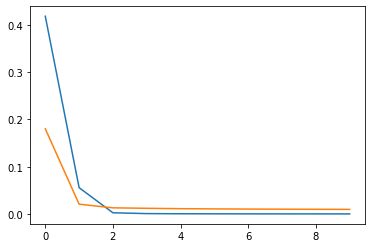

In [32]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

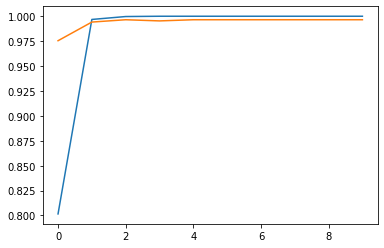

In [33]:
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])

In [34]:
model.evaluate(X_test, y_test, batch_size=64)

23/23 [==============================] - 1s 37ms/step - loss: 0.0162 - accuracy: 0.9923


[0.01624870114028454, 0.9922752976417542]

----------------------------------------------------

# METRICS

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [36]:
y_pred = model.predict(X_test)

y_pred_new = [int(not(i<0.5)) for i in y_pred]
y_test_new = y_test.to_numpy().tolist()


confusion_matrix(y_test_new, y_pred_new)

45/45 [==============================] - 1s 25ms/step


array([[1077,    5],
       [   6,  336]], dtype=int64)

In [37]:
classification_report(y_test_new, y_pred_new)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1082\n           1       0.99      0.98      0.98       342\n\n    accuracy                           0.99      1424\n   macro avg       0.99      0.99      0.99      1424\nweighted avg       0.99      0.99      0.99      1424\n'

In [38]:
precision_score(y_test_new, y_pred_new)

0.9853372434017595